In [15]:
import os
import csv
import math
import random
import cv2
import operator
import numpy as np
import pandas as pd
from PIL import Image
from glob import iglob
from matplotlib import pyplot as plt

In [16]:
data_Arr = []
color1 = []
color2 = []
color3 = []

for i in range(1,5001):
    img = cv2.imread("Cats/"+ str(i)+ ".jpg")
    np_im = np.reshape(img, (4096, 3))
    #im = Image.open("Cats/"+ str(i)+ ".jpg")
    #np_im = np.array(im)
    #np_im = np.reshape(np_im, (4096, 3))
    #np.append(data_Arr, np.atleast_3d(np_im), axis=1)
    data_Arr.append(np_im)

In [17]:
data_Arr = np.array(data_Arr)
colorRed = data_Arr[:,:,0]
colorGreen = data_Arr[:,:,1]
colorBlue = data_Arr[:,:,2] 

In [18]:
#PCA (part a of Question1)
URED, SRED, VRED = np.linalg.svd(colorRed, full_matrices=False)
UGREEN, SGREEN, VGREEN = np.linalg.svd(colorGreen, full_matrices=False)
UBLUE, SBLUE, VBLUE = np.linalg.svd(colorBlue, full_matrices=False)

In [22]:
EX_VAR_RED = (SRED**2)/(4999)
EX_VAR_GREEN = (SGREEN**2)/(4999)
EX_VAR_BLUE = (SBLUE**2)/(4999)

TOT_R = EX_VAR_RED.sum()
TOT_G = EX_VAR_GREEN.sum()
TOT_B = EX_VAR_BLUE.sum()

print ("PVE RATIO FOR RED: " + str((EX_VAR_RED/TOT_R)[:10]))
print ("PVE RATIO FOR GREEN: " + str((EX_VAR_GREEN/TOT_G)[:10]))
print ("PVE RATIO FOR BLUE: " + str((EX_VAR_BLUE/TOT_B)[:10]))

PVE RATIO FOR RED: [0.8173209  0.02851471 0.02443124 0.01644898 0.00877841 0.00612892
 0.00581728 0.00466474 0.00374913 0.00332108]
PVE RATIO FOR GREEN: [0.84269305 0.02530509 0.0213064  0.01386851 0.00723721 0.00531647
 0.00505388 0.0038718  0.0035987  0.00295344]
PVE RATIO FOR BLUE: [0.86574708 0.02321492 0.01840561 0.01223756 0.00564718 0.00451281
 0.0043853  0.00344601 0.00305898 0.00247767]


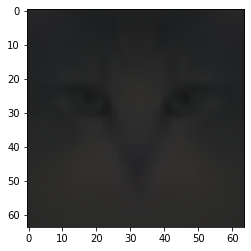

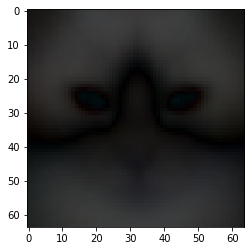

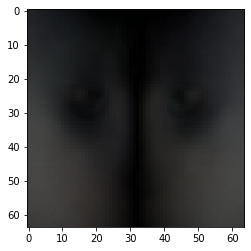

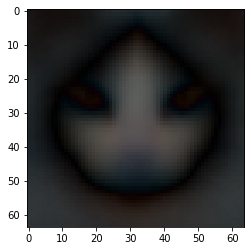

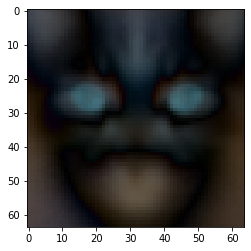

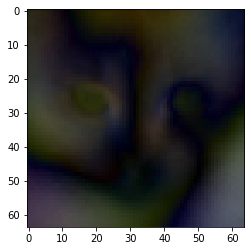

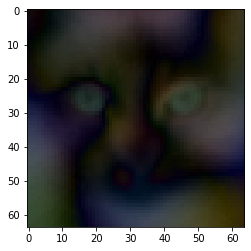

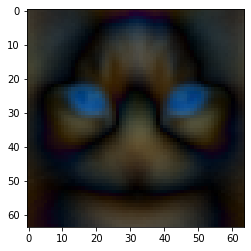

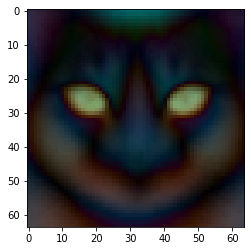

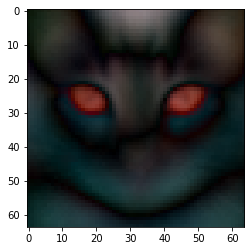

In [23]:
#PCA (part b of Question1)

V_RED_SHAPE = np.reshape(VRED[0:10], (10, 64, 64))
V_GREEN_SHAPE = np.reshape(VGREEN[0:10], (10, 64, 64))
V_BLUE_SHAPE = np.reshape(VBLUE[0:10], (10, 64, 64))

V_RED_SHAPE =  np.absolute(V_RED_SHAPE)
V_GREEN_SHAPE = np.absolute(V_GREEN_SHAPE)
V_BLUE_SHAPE = np.absolute(V_BLUE_SHAPE)

finImage = np.stack((V_RED_SHAPE, V_GREEN_SHAPE, V_BLUE_SHAPE), axis = 3)
finImageIn = np.absolute(finImage)
finImageInFin = np.multiply(finImageIn,10)
for i in range(0,10):
    plt.imshow(finImageInFin[i])
    plt.show()

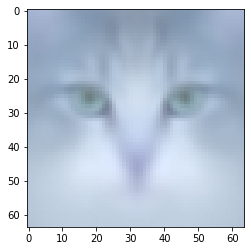

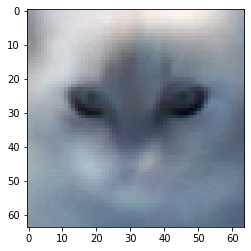

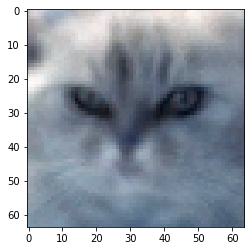

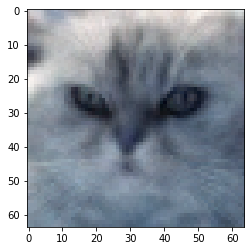

In [25]:
#Question 1 Part C
for k in [1,50,250,500]:
    data_reduced_red = np.dot(colorRed[0], np.transpose(VRED[0:k,:]))
    data_original_red = np.dot(data_reduced_red, VRED[0:k,:]).reshape(64,64)
    data_reduced_green = np.dot(colorGreen[0], np.transpose(VGREEN[0:k,:]))
    data_original_green = np.dot(data_reduced_green, VGREEN[0:k,:]).reshape(64,64)
    data_reduced_blue = np.dot(colorBlue[0], np.transpose(VBLUE[0:k,:]))
    data_original_blue = np.dot(data_reduced_blue, VBLUE[0:k,:]).reshape(64,64)
    finImageK = np.stack((data_original_red, data_original_green, data_original_blue), axis = 2)
    num = 1 / np.amax(finImageK)
    finImageInK = np.multiply(finImageK, num)
    plt.imshow(finImageInK)
    plt.show()